# Microsoft Malware Prediction
W207 Final Project<br>

Gunnar Mein<br>
Andrew Morris<br>
Kevin Hartman

https://www.kaggle.com/c/microsoft-malware-prediction

## Contents

<ol>
    <li><a href='#Summary'>The Competition: Can you predict if a machine will soon be hit with malware?</a></li>
    <li><a href='#EDA'>Exploratory Data Analysis</a></li>
    <li><a href='#Cleaning'>Data Wrangling and Cleaning</a></li>
    <li><a href='#Preprocessing'>Encoding and Transformations</a></li>
    <li><a href='#Feature Selection'>Feature Selection and Enginering</a></li>
    <li><a href='#Training'>Model Fitting and Evaluation</a></li>
    <li><a href='#Conclusion'>Review and Conclusion</a></li>
</ol>

We used the following classifiers that were covered in the course:

- **k Nearest Neighbors** (week 2)
- **Decision Trees**, as well as **Random Forests**, **AdaBoost**, and **Gradient Boosting** (week 4)
- **Logistic Regression** (week 5)
- **Neural Networks** (week 7)
- **PCA and Gaussian Mixture Models** (weeks 9 and 10)


We did not pursue Naive Bayes (week 3), Stochastic Gradient Descent (week 6) or Support Vector Machines (week 8)*, or due to time constraints, and because our EDA did not provide enough support to investigate these approaches.

\* Of note, I did run very limited LinearSVM() but the results showed the model just basically guessed all positives or all negatives and it was always half-right.

## Summary

<a href='#Contents'>[Back to top]</a>

## EDA

<a href='#Contents'>[Back to top]</a>

Raw notes:

Analysis workbook for seaborn plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') #hide warnings that arise from missing glyphs, deprecations, etc.

In [2]:
#load with pre-informed data types for faster loading
def load_from_raw_data(filename):
    dtypes = {
        'MachineIdentifier':                                    'str',
        'ProductName':                                          'str',
        'EngineVersion':                                        'str',
        'AppVersion':                                           'str',
        'AvSigVersion':                                         'str',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float64',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'str',
        'Processor':                                            'str',
        'OsVer':                                                'str',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'str',
        'OsBuildLab':                                           'str',
        'SkuEdition':                                           'str',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'str',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'str',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', 
        'Census_MDC2FormFactor':                                'str',
        'Census_DeviceFamily':                                  'str',
        'Census_OEMNameIdentifier':                             'float32', 
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', 
        'Census_ProcessorClass':                                'str',
        'Census_PrimaryDiskTotalCapacity':                      'float64', 
        'Census_PrimaryDiskTypeName':                           'str',
        'Census_SystemVolumeTotalCapacity':                     'float64', 
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'str',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', 
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', 
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', 
        'Census_PowerPlatformRoleName':                         'str',
        'Census_InternalBatteryType':                           'str',
        'Census_InternalBatteryNumberOfCharges':                'float64', 
        'Census_OSVersion':                                     'str',
        'Census_OSArchitecture':                                'str',
        'Census_OSBranch':                                      'str',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'str',
        'Census_OSSkuName':                                     'str',
        'Census_OSInstallTypeName':                             'str',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'str',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'str',
        'Census_ActivationChannel':                             'str',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'str',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

    df = pd.read_csv(filename, dtype=dtypes, engine='c')
    return df

In [3]:
# Custom-made class to assist with EDA on this dataset
# The code is generalizable. However, specific decisions on plot types were made because
# all our features are categorical
class Analyze:
    def __init__(self, df):
        self.df = df
        
    def print_eda_summary(self):
        #sns.set(rc={'figure.figsize':(10*2,16*8)})
        sns.set()
        i=0
        fig, ax = plt.subplots(nrows=round(len(df.columns)), ncols=2, figsize=(16,5*round(len(df.columns))))
        all_cols=[]
        for col in df.columns:
            #if col == 'MachineIdentifier': continue
            all_cols.append(col)
            max_len = df[col].nunique()
            if max_len > 10:
                max_len = 10
            g=sns.countplot(y=df[col].fillna(-1), hue=df['HasDetections'], order=df[col].fillna(-1).value_counts(dropna=False).iloc[:max_len].index, ax=ax[i][0])
            g.set_xlim(0,df.shape[0])
            plt.tight_layout()
            ax[i][0].title.set_text(col)
            ax[i][0].xaxis.label.set_visible(False)
            xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
            g.set_xticklabels(xlabels)
            ax[i][1].axis("off")
            # Basic info
            desc = df[col].describe()
            summary = "DESCRIPTION\n   Name: {:}\n   Type: {:}\n  Count: {:}\n Unique: {:}\nMissing: {:}\nPercent: {:2.3f}".format(
                desc.name.ljust(50), str(desc.dtype).ljust(10), df[col].count(), df[col].nunique(),
                ('yes' if df[col].hasnans else 'no'), (1-df[col].count()/df.shape[0])*100)
            ax[i][1].text(0, 1, summary, verticalalignment="top", family='monospace', fontsize=12)
            analysis=[]
            if df[col].dtype.name == 'object': 
                # additional analysis for categorical variables
                if len(df[col].str.lower().unique()) != len(df[col].unique()):
                    analysis.append("- duplicates from case\n")
                # look for HTML escape characters (&#x..;)
                # and unicode characters (searching for: anything not printable)
                df_bad = df[col][df[col].str.contains(r'[\x00-\x1f]|&#x\d\d;', regex=True, na=True)]
                if len(df_bad) - df.shape[0] - df[col].count()>0:
                    analysis.append("- illegal chars: {:}\n".format(len(df_bad) - df.shape[0] - df[col].count()))
                # find different capitalizations of "unknown"
                # if more than one present, need to read as string, turn to lowercase, then make categorical
                df_unknown = df[col].str.lower() == 'unknown'
                unknowns = df[col][df_unknown].unique()
                if len(unknowns) > 1:
                    analysis.append("- unknowns\n  {:}\n".format(unknowns))
                df[col] = df[col].astype('category')
                if len(''.join(analysis)) > 0:
                    ax[i][1].text(.5, .85, 'FINDINGS\n'+''.join(analysis), verticalalignment="top", family='monospace', fontsize=12)
            else:
                # Stats for numeric variables
                statistics = "STATS\n   Mean: {:5.4g}\n    Std: {:5.4g}\n    Min: {:5.4g}\n    25%: {:5.4g}\n    50%: {:5.4g}\n    75%: {:5.4g}\n    Max: {:5.4g}".format(
                    desc.mean(), desc.std(), desc.min(), desc.quantile(.25), desc.quantile(.5), desc.quantile(.75), desc.max())
                ax[i][1].text(.5, .85, statistics, verticalalignment="top", family='monospace', fontsize=12)

            # Top 5 and bottom 5 unique values or all unique values if < 10
            if df[col].nunique() <= 10:
                values = pd.DataFrame(list(zip(df[col].value_counts(dropna=False).keys().tolist(),
                                         df[col].value_counts(dropna=False).tolist())),
                                columns=['VALUES', 'COUNTS'])
                values = values.to_string(index=False)
                ax[i][1].text(0, .6, values, verticalalignment="top", family='monospace', fontsize=12)
            else:
                values = pd.DataFrame(list(zip(df[col].value_counts(dropna=False).iloc[:5].keys().tolist(),
                                         df[col].value_counts(dropna=False).iloc[:5].tolist())),
                                columns=['VALUES', 'COUNTS'])
                mid_row = pd.DataFrame({'VALUES':[":"],
                                        'COUNTS':[":"]})
                bot_values = pd.DataFrame(list(zip(df[col].value_counts(dropna=False).iloc[-5:].keys().tolist(),
                                         df[col].value_counts(dropna=False).iloc[-5:].tolist())),
                                columns=['VALUES', 'COUNTS'])
                values = values.append(mid_row)
                values = values.append(bot_values)
                values = values.to_string(index=False)
                ax[i][1].text(0, .6, values, verticalalignment="top", family='monospace', fontsize=12)
            i=i+1
        fig.show()

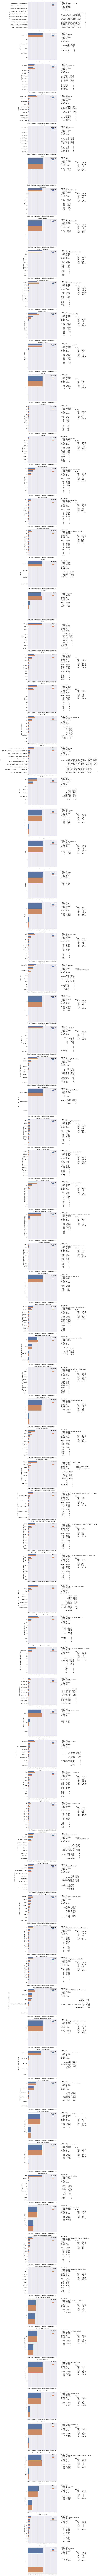

In [4]:
#Analyze the datasets
df = load_from_raw_data("data/train.csv")
analyzer = Analyze(df)
analyzer.print_eda_summary()

Notes:
* Fields with largely missing values:
 * PuaMode - missing 99.9% of the data - remove
 * Census_ProcessorClass - 99.5% missing - remove
 * DefaultBrowsersIdentifier - 95% missing - probably would correlate well with malware but its all missing - remove 
 * Census_IsFlightingInternal - 83 missing (21 are 1s and rest are 0) - remove
 * Census_InternalBatteryType - 70% missing - battery correlates to malware how? - remove
* Binary fields
 * Census_IsWIMBootEnabled - It is 0 or missing. One value is set to 1. Recode the 1 as a "missing" and make this a binary field?
 * Census_IsFlightsDisabled - Mostly 0s. 2% are missing. 88 are 1s. Recode the 1 as "missing" and then it becomes a binary field?
 * Census_IsPortableOperatingSystem - Mostly 0s - remove
 * IsBeta - mostly 0s. 67 are 1s. - remove
 * AutoSampleOptIn - Mostly 0s. - remove
* Other fields
 * UacLuaenable - Mostly 1s. Zero out the rest and turn into a binary field.
 * AvProductsInstalled - Bin 4,5,6 and 7 into one bin. Move 0 and the missings together.
 * AvProductsEnabled - Bin 4 and 5 together. 
 * RtpStateBitField - Bin 3, 1 and 35 together with the missing category.
 * SmartScreen - Bin the garbage and low frequency values with the missing category. Correct spellings on the others.
 * Census_ProcessorCoreCount - could bin but need to probe in further to see how
 * Census_ProcessorManufacturerIdentifier - bin 10, 3, 9, 7 and 4 with the missing category.
 * Census_InternalPrimaryDiagonalDisplaySizeInInches - bin these by real inches w/o the fractions - need to probe in further
 * Census_InternalPrimaryDisplayResolutionHorizontal - same as above
 * Census_InternalPrimaryDisplayResolutionVertical - same as above
 * Census_GenuineStateName - Bin TAMPERED with UNKNOWN
 * Census_FlightRing - Bin Invalid with Unknown
 * Census_PrimaryDiskTotalCapacity - Bin this by range?
 * Census_SystemVolumeTotalCapacity - Same as above
 * Census_TotalPhysicalRam - Same as above
 * Census_ChassisTypeName - Look into binning
 
 

### Re-run with the test data set included

In [ ]:
test_df = load_from_raw_data("data/test.csv")
test_df['HasDetections'] = np.int8(2)
full_df = pd.concat([df, test_df])

analyzer = Analyze(full_df)
analyzer.print_eda_summary()

## Cleaning

<a href='#Contents'>[Back to top]</a>

Raw notes:

Wrangling notebook

To clean the SmartScreen and turn into bins:

In [ ]:
df.replace({'SmartScreen':
        {'Enabled':'on',
         'RequiredAdmin':'requireadmin',
         'of':'off',
         'Promt':'prompt',
         'Promprt':'prompt'}})

df['SmartScreen'] = df['SmartScreen'].str.replace(r'&#x(\d\d);', '\1', regex=True)
df['SmartScreen'] = df['SmartScreen'].str.replace(r'[\x00-\x1f]', '', regex=True)
df['SmartScreen'] = df['SmartScreen'].str.lower()
df.fillna({'SmartScreen':'missing'})

# Plot to confirm
sns.countplot(y=df['SmartScreen'], hue=df['HasDetections'], order=df['SmartScreen'].value_counts().index)

## Preprocessing

<a href='#Contents'>[Back to top]</a>

Raw notes:

Encoding portion of wrangler and description of what we did and why we did it

## Feature Selection

<a href='#Contents'>[Back to top]</a>

Raw notes:

Selection of Features using correlation, corplot analysis, and Gunnar's incremental trick

Selection of Features using SelectFromModel

Selection of Features using PCA (with GMM)

Selection of Features using Ridge Regression (not sure if we want to include)

## Model Fitting

<a href='#Contents'>[Back to top]</a>

## Conclusion

<a href='#Contents'>[Back to top]</a>